Расчёт среднего арифметического для категорий художественный и философия для метрик BLEU, ROUGE 1, METEOR для EN-RU и RU-EN 

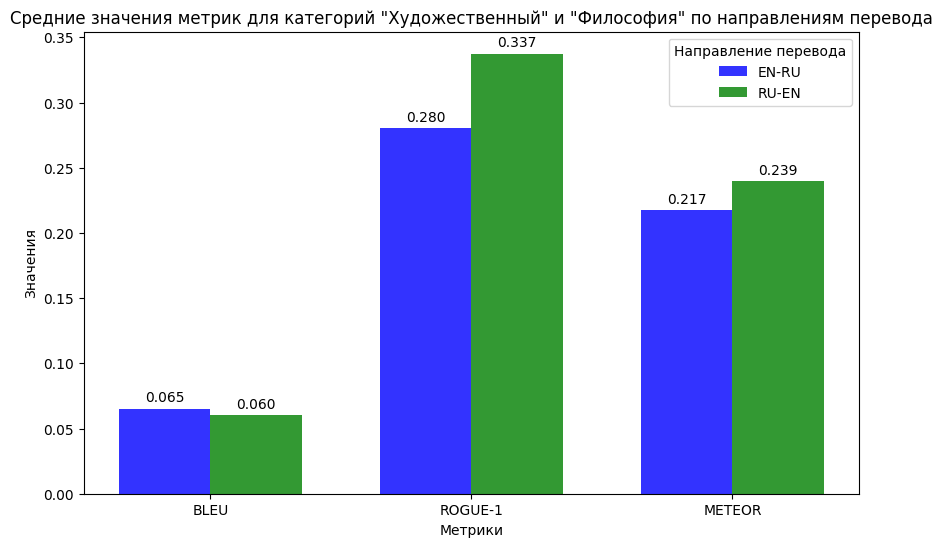

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Задаем данные для графика
categories = ['BLEU', 'ROGUE-1', 'METEOR']
en_ru_scores = [0.065, 0.2803404289918031, 0.21718812297769585]
ru_en_scores = [0.06020376613486185, 0.3374063647818426, 0.23948129544594812]
index = np.arange(len(categories))  # Индексы для группировки столбцов
bar_width = 0.35  # Ширина столбцов

# Цвета для каждой группы
colors_en_ru = ['blue'] * len(categories)
colors_ru_en = ['green'] * len(categories)

# Создаем график
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем столбцы для каждого направления с разными цветами
bars_en_ru = ax.bar(index, en_ru_scores, bar_width, label='EN-RU', color=colors_en_ru, alpha=0.8)
bars_ru_en = ax.bar(index + bar_width, ru_en_scores, bar_width, label='RU-EN', color=colors_ru_en, alpha=0.8)

# Функция для добавления подписей к столбцам
def add_labels(bars, scores):
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        ax.annotate(f'{score:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Отступ по вертикали 3 пункта
                    textcoords="offset points",
                    ha='center', va='bottom')

# Добавляем подписи к столбцам
add_labels(bars_en_ru, en_ru_scores)
add_labels(bars_ru_en, ru_en_scores)

# Настраиваем подписи осей и заголовок
ax.set_xlabel('Метрики')
ax.set_ylabel('Значения')
ax.set_title('Средние значения метрик для категорий "Художественный" и "Философия" по направлениям перевода')
ax.set_xticks(index + bar_width / 2)  # Центрирование подписей метрик под столбцами
ax.set_xticklabels(categories)
ax.legend(title="Направление перевода")

# Отображаем график
plt.show()


In [3]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('data.csv')

# Функция для расчета средних значений по выбранным категориям и метрикам
def compute_selected_means(direction):
    # Фильтрация данных по направлению и категориям "Художественный" и "Философия"
    filtered_df = df[(df['Направление перевода'] == direction) & 
                     (df['Категория'].isin(['Художественный', 'Философия']))]

    # Вычисление средних значений для BLEU, ROUGE-1 и METEOR
    bleu_mean = filtered_df['BLEU'].mean()
    rouge_1_mean = filtered_df['ROUGE-1'].mean()
    meteor_mean = filtered_df['METEOR'].mean()

    print(f"\nСредние значения для категорий 'Художественный' и 'Философия' ({direction}):")
    print(f"BLEU: {bleu_mean}")
    print(f"ROUGE-1: {rouge_1_mean}")
    print(f"METEOR: {meteor_mean}")

# Средние значения для EN-RU
compute_selected_means('EN-RU')

# Средние значения для RU-EN
compute_selected_means('RU-EN')



Средние значения для категорий 'Художественный' и 'Философия' (EN-RU):
BLEU: 0.06589438481382653
ROUGE-1: 0.2803404289918031
METEOR: 0.21718812297769585

Средние значения для категорий 'Художественный' и 'Философия' (RU-EN):
BLEU: 0.06020376613486185
ROUGE-1: 0.3374063647818426
METEOR: 0.23948129544594812


En-Ru Artistic Metric. Художественная метрика с английского на русский:

-------------------------------------------------------------------------------

In [4]:
# Среднее арифметическое метрик оценки качества перевода художественных текстов 
er_bleu_score = 0.06589438481382653
er_rouge1_score = 0.2803404289918031
er_meteor_score = 0.21718812297769585


# Функция для вычисления взвешенной метрики на основе предоставленных BLEU, METEOR и ROUGE-1
def calculate_weighted_metric(er_bleu, er_meteor, er_rouge1):
    # Вычисление суммы всех метрик
    er_k = er_bleu + er_meteor + er_rouge1

    # Вычисление весов для каждой метрики
    er_w_bleu = er_bleu / er_k
    er_w_rouge1 = er_rouge1 / er_k
    er_w_meteor = er_meteor / er_k
   

    # Вычисление суммы весов (должно быть 1)
    er_total_weight = er_w_bleu + er_w_meteor + er_w_rouge1

    # Вычисление новой художественной метрики с весами
    er_art = er_w_bleu * er_bleu + er_w_meteor * er_meteor + er_w_rouge1 * er_rouge1

    return er_w_bleu, er_w_meteor, er_w_rouge1, er_total_weight, er_art



# Вызов функции для вычисления весов и взвешенной метрики
er_w_bleu, er_w_meteor, er_w_rouge1, er_total_weight, er_art = calculate_weighted_metric(er_bleu_score, er_meteor_score, er_rouge1_score)

print("En-Ru веса для метрики BLEU", er_w_bleu)
print("En-Ru веса для метрики ROGUE:", er_w_rouge1)
print("En-Ru веса для метрики METEOR:", er_w_meteor)
print("En-Ru сумма всех весов:", er_total_weight)
print("En-Ru художественная метрика:", er_art)


En-Ru веса для метрики BLEU 0.1169536781552211
En-Ru веса для метрики ROGUE: 0.4975665893055631
En-Ru веса для метрики METEOR: 0.3854797325392159
En-Ru сумма всех весов: 1.0
En-Ru художественная метрика: 0.23091624132779895


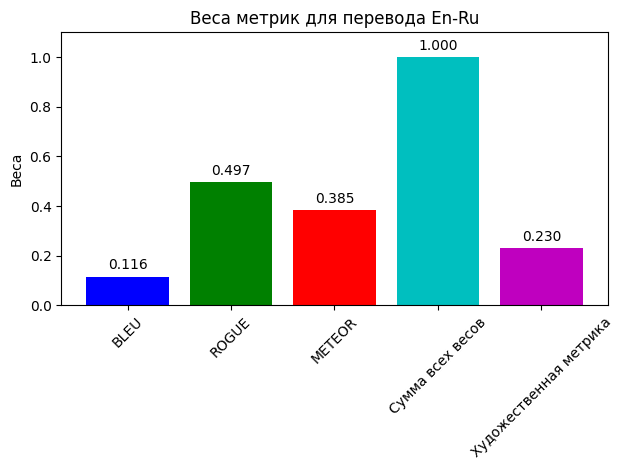

In [5]:
import matplotlib.pyplot as plt

# Значения для столбчатой диаграммы
labels = ['BLEU', 'ROGUE', 'METEOR', 'Сумма всех весов', 'Художественная метрика']
values = [0.116, 0.497, 0.385, 1.0, 0.230]
colors = ['b', 'g', 'r', 'c', 'm']  # Разные цвета для столбцов

# Создание столбчатой диаграммы
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=colors)

# Добавление значений на столбцы
ax.bar_label(bars, labels=[f'{v:.3f}' for v in values], padding=3)

# Настройки графика
plt.ylabel('Веса')
plt.title('Веса метрик для перевода En-Ru')
plt.xticks(rotation=45)
plt.ylim(0, max(values) + 0.1)  # Увеличиваем верхнюю границу для лучшей видимости меток
plt.tight_layout()

# Отображение диаграммы
plt.show()


-------------------------------------------------------------------------------

Ru-En Artistic Metric. Художественная метрика с русского на английский:

In [6]:
# Среднее арифметическое метрик оценки качества перевода художественных текстов 
re_bleu_score = 0.06020376613486185
re_rouge1_score = 0.3374063647818426
re_meteor_score = 0.23948129544594812


# Функция для вычисления взвешенной метрики на основе предоставленных BLEU, METEOR и ROUGE-1
def calculate_weighted_metric(re_bleu, re_meteor, re_rouge1):
    # Вычисление суммы всех метрик
    re_k = re_bleu + re_meteor + re_rouge1

    # Вычисление весов для каждой метрики
    re_w_bleu = re_bleu / re_k
    re_w_rouge1 = re_rouge1 / re_k
    re_w_meteor = re_meteor / re_k
   

    # Вычисление суммы весов (должно быть 1)
    re_total_weight = re_w_bleu + re_w_meteor + re_w_rouge1

    # Вычисление новой художественной метрики с весами
    re_art = re_w_bleu * re_bleu + re_w_meteor * re_meteor + re_w_rouge1 * re_rouge1

    return re_w_bleu, re_w_meteor, re_w_rouge1, re_total_weight, re_art



# Вызов функции для вычисления весов и взвешенной метрики
re_w_bleu, re_w_meteor, re_w_rouge1, re_total_weight, re_art = calculate_weighted_metric(re_bleu_score, re_meteor_score, re_rouge1_score)

print("Ru-En веса для метрики BLEU", re_w_bleu)
print("Ru-En веса для метрики ROGUE:", re_w_rouge1)
print("Ru-En веса для метрики METEOR:", re_w_meteor)
print("Ru-En сумма всех весов:", re_total_weight)
print("Ru-En художественная метрика:", re_art)





Ru-En веса для метрики BLEU 0.09449784386298107
Ru-En веса для метрики ROGUE: 0.529604309240508
Ru-En веса для метрики METEOR: 0.3758978468965109
Ru-En сумма всех весов: 1.0
Ru-En художественная метрика: 0.27440149417593335


NameError: name 'values_ru_en' is not defined

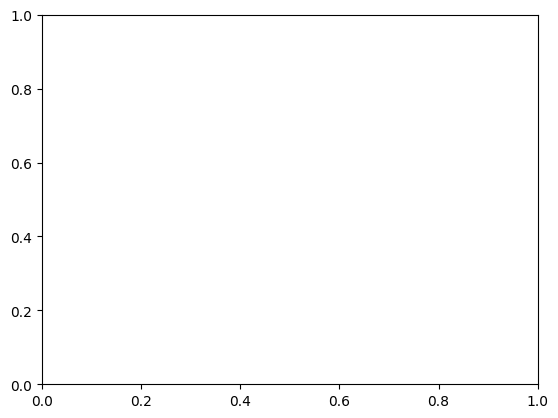

In [8]:
# Исправление форматирования значений на столбцах до трех цифр после запятой
fig, ax = plt.subplots()
bars_ru_en_corrected = ax.bar(labels, values_ru_en, color=colors)

# Добавление значений на столбцы с тремя цифрами после точки
ax.bar_label(bars_ru_en_corrected, labels=[f'{v:.3f}' for v in values_ru_en], padding=3)

# Настройки графика
plt.ylabel('Веса')
plt.title('Веса метрик для перевода Ru-En')
plt.xticks(rotation=45)
plt.ylim(0, max(values_ru_en) + 0.1)  # Увеличиваем верхнюю границу для лучшей видимости меток
plt.tight_layout()

# Отображение диаграммы
plt.show()


-------------------------------------------------------------------------------

Artistic Metric Weights. Среднее арифметическое весов художественной метрики.

In [ ]:
art_bleu = (er_w_bleu + re_w_bleu) / 2
art_rouge = (er_w_rouge1 + re_w_rouge1) / 2
art_meteor = (er_w_meteor + re_w_meteor) / 2
art_total_weight = (er_total_weight+ re_total_weight) / 2
art_average = (er_art + re_art) / 2

print("Ru-En веса для метрики BLEU", art_bleu)
print("Ru-En веса для метрики ROGUE:", art_rouge)
print("Ru-En веса для метрики METEOR:", art_meteor)
print("Ru-En сумма всех весов:", art_total_weight)
print("Ru-En художественная метрика:", art_average)

Ru-En веса для метрики BLEU 0.10572576100910108
Ru-En веса для метрики ROGUE: 0.5135854492730356
Ru-En веса для метрики METEOR: 0.3806887897178634
Ru-En сумма всех весов: 1.0
Ru-En художественная метрика: 0.25265886775186613


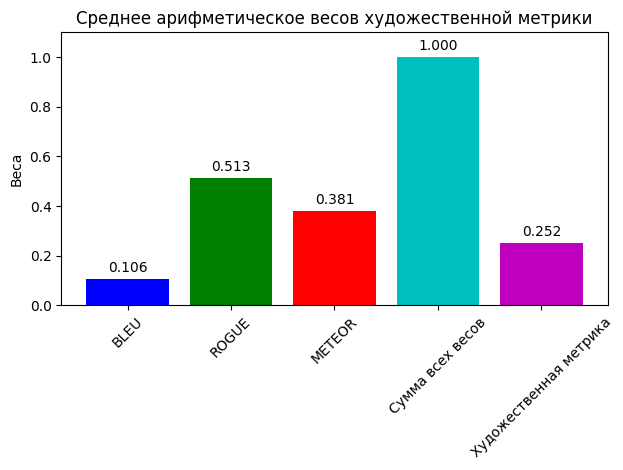

In [11]:
# Новые значения для столбчатой диаграммы
values_ru_en_new = [0.1057, 0.5135, 0.3806, 1.0, 0.252]

# Создание столбчатой диаграммы
fig, ax = plt.subplots()
bars_ru_en_new = ax.bar(labels, values_ru_en_new, color=colors)

# Добавление значений на столбцы с тремя цифрами после точки
ax.bar_label(bars_ru_en_new, labels=[f'{v:.3f}' for v in values_ru_en_new], padding=3)

# Настройки графика
plt.ylabel('Веса')
plt.title('Среднее арифметическое весов художественной метрики')
plt.xticks(rotation=45)
plt.ylim(0, max(values_ru_en_new) + 0.1)  # Увеличиваем верхнюю границу для лучшей видимости меток
plt.tight_layout()

# Отображение диаграммы
plt.show()


-------------------------------------------------------------------------------

Метрика оценки качества перевода художественных текстов с уникальными весами.

In [ ]:
def calculate_artistic_metric(bleu, rouge1, meteor):
    k = bleu + rouge1 + meteor
    weights = {'BLEU': bleu / k, 'ROUGE-1': rouge1 / k, 'METEOR': meteor / k}
    artistic_metric = weights['BLEU'] * bleu + weights['ROUGE-1'] * rouge1 + weights['METEOR'] * meteor
    return artistic_metric, weights

# Пример использования:
bleu, rouge1, meteor = 0.065, 0.280, 0.217  # Примерные средние значения для EN-RU
artistic_metric, weights = calculate_artistic_metric(bleu, rouge1, meteor)
print(f"Взвешенная художественная метрика: {artistic_metric:.3f}")
print("Веса для метрик:", weights)


Взвешенная художественная метрика: 0.231
Веса для метрик: {'BLEU': 0.11565836298932383, 'ROUGE-1': 0.498220640569395, 'METEOR': 0.3861209964412811}


In [ ]:
# Вычисление суммы всех метрик
k = bleu_score + sum(rouge['rouge-1']['f'] for rouge in scores) + score 

# Уникальные веса для каждой метрики оценки качества перевода художественных текстов
w_bleu = 0.1
w_rouge_1 = 0.5
w_score = 0.4

# Вычисление метрики оценки качества перевода художественных текстов с уникальными весами
art_met = w_bleu * bleu_score + w_rouge_1 * sum(rouge['rouge-1']['f'] for rouge in scores) + w_score * score 

# Результаты оценки качества перевода художественного текста
print("Оценка качества перевода художественного текста:", art_met)

NameError: name 'bleu_score' is not defined